# Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('cars.xls')

##### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [6]:
df.describe()#sütunların  istatistik bilgisi

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
df.info()#sütunların isimleri ,veri tipleri dolu kayıt sayısı ve satır sütun sayısı

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [8]:
df.shape#kaç satır kaç stün

(804, 12)

In [9]:
df['Make'].unique()# tekil markalar

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [10]:
df['Make'].nunique()#number of unique

6

In [11]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [12]:
df.corr()#Pearson correlation matrix- sütunların birbirlerine bağlılık oranı

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [13]:
abs(df.corr()['Price']).sort_values(ascending=False)#abs absolute value

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#en sonuncuyu yazmazsak tablo ramde olusur

<AxesSubplot:>

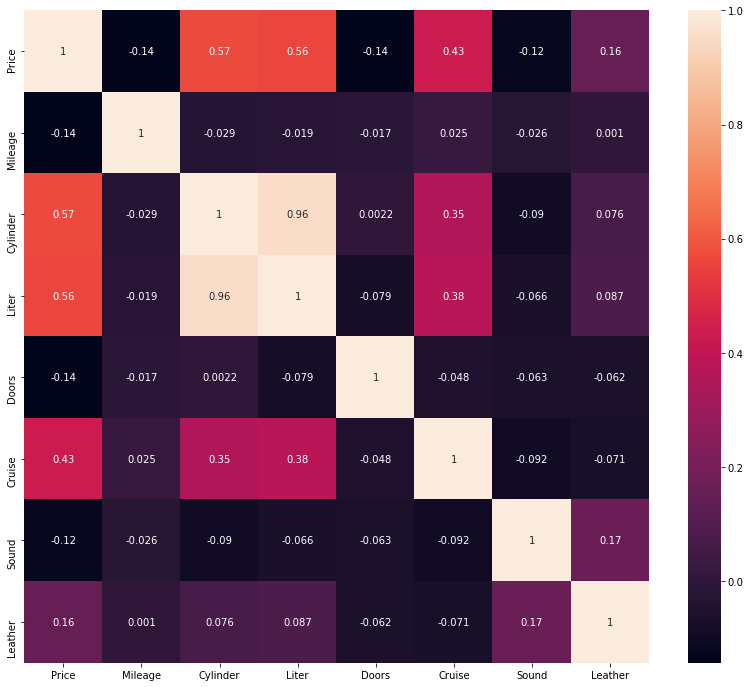

In [15]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot= True)

In [16]:
#Korelasyonu %20 ile %9* arası olan sütunları alıyoruz          
x = df[['Mileage','Cylinder','Liter','Cruise']]

In [17]:
x.head()

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1


In [18]:
#hedefimizi tanımlıyoruz
y = df[['Price']]

In [19]:
y.shape

(804, 1)

In [20]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


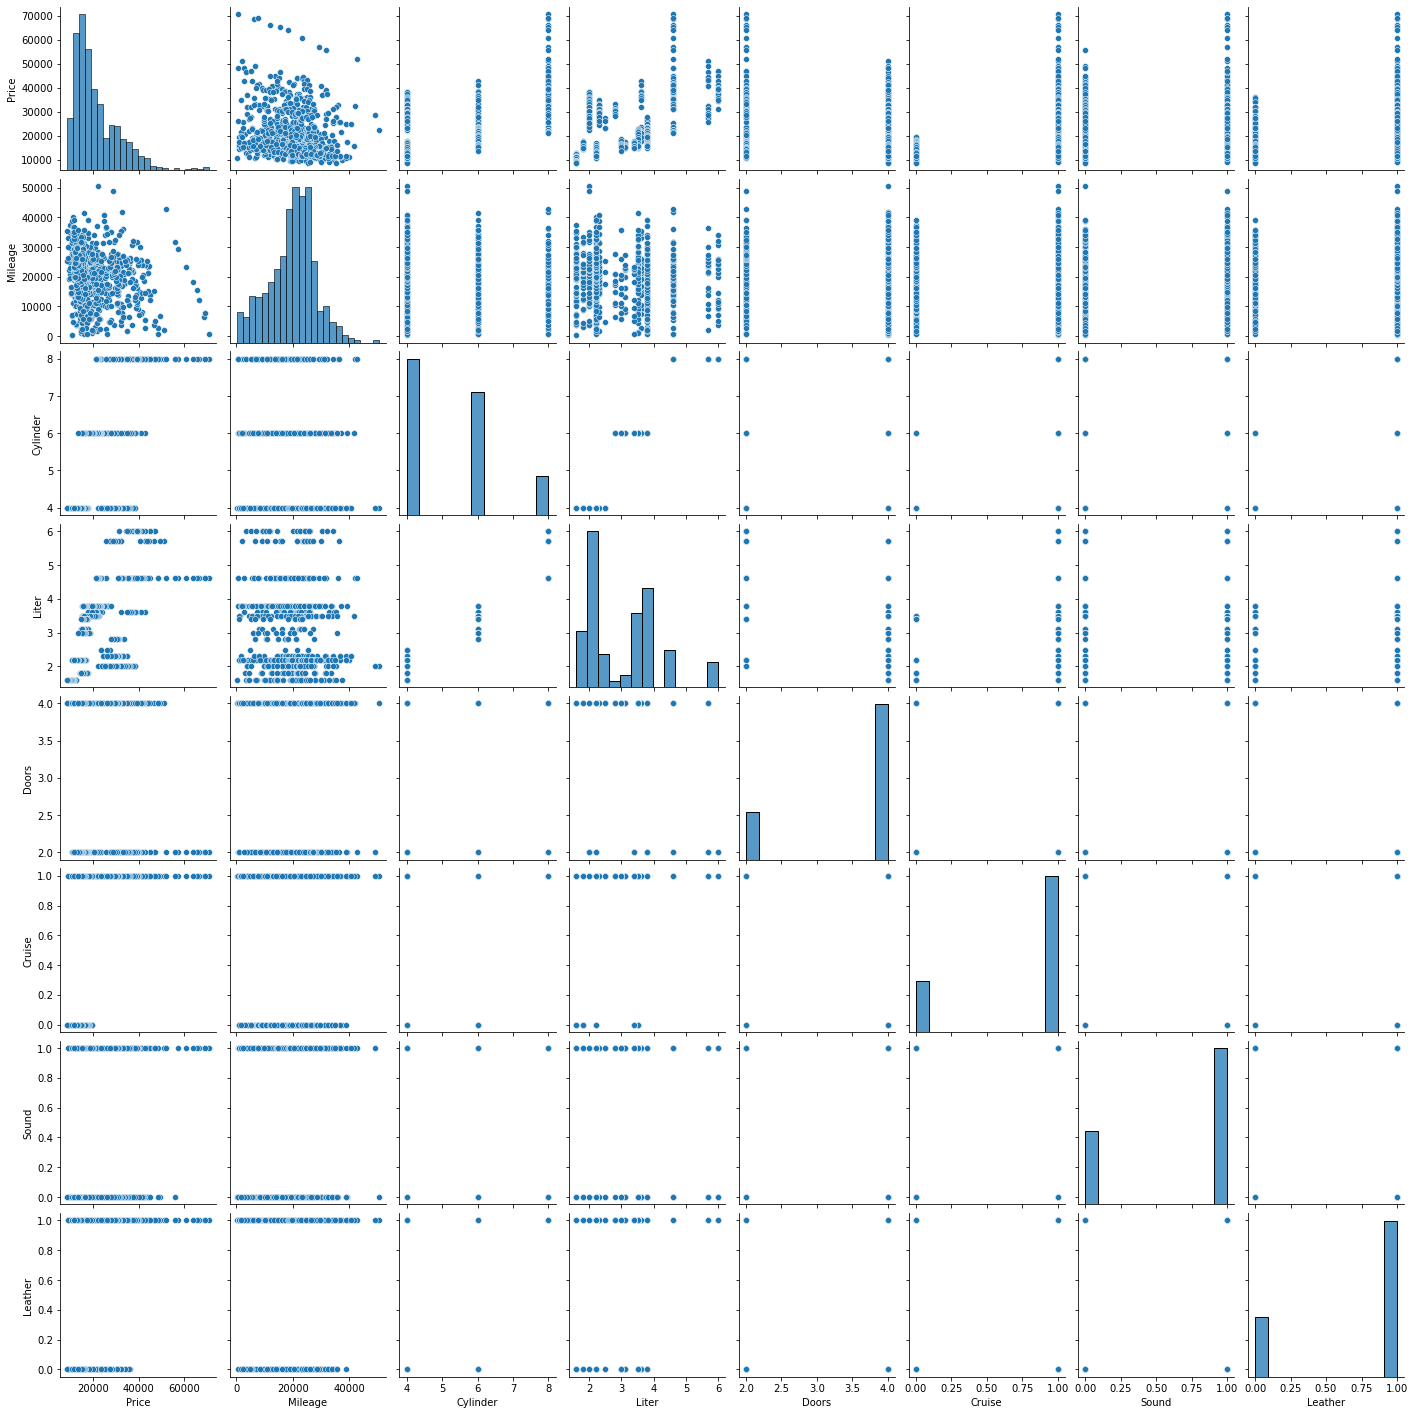

In [21]:
sns.pairplot(df)#bütun sutunların butun sutunlara gore degisimini cizer

In [22]:
from sklearn.linear_model import LinearRegression #sk-science kit learn,es.kay learn demek
from sklearn.model_selection import train_test_split#%80ini veriyoruz %20sini saklıyoruz % 20sini kendi hesaplıyor ,basarı oranını karsılastırıyor
#yani %80i ile biz eğitiyoruz kalanını tahmin ettiriyoru< sonra da basarı oranımızı hesaplıyoruz 80 ve  üstü çıkarsa basarılı

In [23]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)#random state bilgisayar randm sayıyı uretirken bilgisayarın saatini kullanır eger biz deger verirsek random state verirsek o sayıyı referans alır yanı diger seferkinde degisen saati deil 13 u referans alır


In [24]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((643, 4), (161, 4), (643, 1), (161, 1))

In [25]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)#MODEL X_TRAİN verisine karsılık y_train verisine bakıp ogreniyor

In [26]:
y_pretest = regmodel.predict(x_test)#ogrendigi model ile test icin  ayırdıgımız verinin fiyatlarını tahmin ediyor
y_pretest

array([[11148.62940387],
       [25662.63147418],
       [18279.41766294],
       [11540.73917302],
       [23426.0701786 ],
       [31420.5453541 ],
       [19328.85628173],
       [24773.25185754],
       [29200.32466335],
       [11183.31863407],
       [24299.55929987],
       [20538.26465205],
       [17881.31995338],
       [26696.26797506],
       [24162.40088302],
       [20818.88388614],
       [11374.10940017],
       [24693.41195717],
       [24567.80942355],
       [30460.75963077],
       [20163.65672799],
       [18471.51729144],
       [18182.01235844],
       [30285.16775419],
       [24998.35059689],
       [23758.4680427 ],
       [12176.58918638],
       [17891.15452895],
       [24576.53671008],
       [13871.91278504],
       [12783.85110583],
       [23880.42757003],
       [19007.58027511],
       [24351.9507661 ],
       [25304.65292335],
       [15315.44966857],
       [34075.70194812],
       [26798.72130862],
       [29833.85014066],
       [11163.64948293],


###### !!!bundan sonra butun makine ogrenmesinde ogrenmek fit ,tahmin etmek predict

In [27]:
from sklearn.metrics import mean_squared_error, r2_score 
#basarı hesaplama kısmı
#r2 %80 ve üzeri ise basarılı

In [28]:
 (mean_squared_error(y_test, y_pretest)) ** 0.5 #araba basına hata oranı yani biz toplam  8000 dolar hatalı bulduk

8036.440424336674

In [29]:
r2_score(y_test, y_pretest)#basarı oranı

0.45340342779819476

Note:0.45 yuzde 45 , basarısız old için modelimizi yeniden tanımlıyacaz

In [30]:
x,y =df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']],df[['Price']]

In [31]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [32]:
# text alanlarını numeric alana ceviriyoruz
x= pd.get_dummies(x, drop_first=True)
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=13)#random state bilgisayar randm sayıyı uretirken bilgisayarın saatini kullanır eger biz deger verirsek random state verirsek o sayıyı referans alır yanı diger seferkinde degisen saati deil 13 u referans alır
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)#MODEL X_TRAİN verisine karsılık y_train verisine bakıp ogreniyor
y_pretest = regmodel.predict(x_test)#ogrendigi model ile test icin  ayırdıgımız verinin fiyatlarını tahmin ediyor
y_pretest

array([[12598.2920699 ],
       [20910.1504077 ],
       [16284.23720867],
       [11119.83213478],
       [17775.57209261],
       [30779.12880603],
       [17879.17308903],
       [30471.84518438],
       [62259.5452672 ],
       [11547.99027102],
       [17532.97925807],
       [14421.95947463],
       [12687.08301809],
       [22994.1808852 ],
       [17783.47184065],
       [19408.87684133],
       [13336.89617232],
       [35337.86682389],
       [17013.57763966],
       [37651.52782558],
       [13843.31249302],
       [30186.70701063],
       [27761.42782217],
       [63373.27533623],
       [20228.18119616],
       [16261.32566591],
       [ 9477.80239708],
       [11510.29857391],
       [18534.021751  ],
       [13891.67907375],
       [12735.44912618],
       [22322.79628175],
       [33231.0275061 ],
       [18342.65116507],
       [20634.08372835],
       [15264.78092984],
       [33504.98636248],
       [59793.99251344],
       [36870.45285288],
       [11002.42746474],


In [34]:
(mean_squared_error(y_test, y_pretest)) ** 0.5 #bazıları eksi old için once karesi sonra karekokunu alıoruz


1715.1549742445397

In [35]:
r2_score(y_test, y_pretest)#basarı ora

0.9717973599236387

NOTE: %97 basarı elde ettik fakat  bunu artırmak için başka modellere de ihtiyac var yanı linear regressiondan baska seeylerle de tahmin ettirmemiz lazım bunun için lasso ve ridge var

In [36]:
#LİNEER REGRESSİON
#RİDGE LASSO hataların karesini alıp ona göre yol izler ve azaltmaya çalısır
from sklearn.linear_model import Ridge, Lasso

In [37]:
R = Ridge()
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [38]:
y_pred_ridge

array([[12547.06096795],
       [21083.62667108],
       [16646.51463203],
       [11099.62475576],
       [17810.15831786],
       [30377.36935397],
       [18260.40074386],
       [30839.88710425],
       [59018.32787218],
       [11545.92688012],
       [18597.35756302],
       [14499.47323352],
       [12506.84981056],
       [23241.34717614],
       [17922.54994885],
       [19781.34473191],
       [13450.33836268],
       [35007.77699073],
       [17510.30621881],
       [38169.13024838],
       [13562.73097944],
       [30050.76366604],
       [27886.46066696],
       [60125.68022733],
       [20405.56271865],
       [16555.93317047],
       [ 9823.54724733],
       [11243.07693598],
       [18738.37009621],
       [14036.9270011 ],
       [12867.10149153],
       [22057.52145177],
       [32724.34259025],
       [18568.31203248],
       [20781.66033397],
       [15656.50760348],
       [33087.61743731],
       [56566.89397041],
       [37184.66889582],
       [11418.56227066],


In [39]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

1830.2364265268047

In [40]:
r2_score(y_test, y_pred_ridge)

0.9678857769105056

In [41]:
#Lasso regrerssion hataların mutlak degerini alarak yol izler

In [42]:
L= Lasso()
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [43]:
y_pred_lasso

array([12578.90817824, 20987.6582798 , 16382.40574686, 11076.81972427,
       17805.24482828, 30299.22750803, 17998.81611986, 30610.12752471,
       62183.94937511, 11554.83592352, 17650.15919418, 14459.61846875,
       12702.22475924, 23054.34911496, 17683.54791241, 19517.70769781,
       13407.97298427, 35370.152177  , 16807.65807345, 37760.81143091,
       13824.42002396, 30091.73170582, 27748.82601251, 63289.80743384,
       20310.50932839, 16328.55252884,  9621.88017615, 11507.8961953 ,
       18439.25212238, 14099.40519178, 12856.61084552, 22238.85445063,
       33164.34264281, 18343.97097677, 20706.49495928, 15406.25689367,
       33005.81829659, 59735.82351605, 36842.24412143, 11174.03037879,
       27278.8566203 , 18536.61401022, 11264.63693059, 26249.7999892 ,
       16758.44413298, 27741.31733267, 17865.20701731, 11536.60849549,
       10988.58062248, 18473.70691763, 44988.83098241, 18806.54134411,
       12744.72242548, 13787.77666443, 21272.24742392, 13005.44155965,
      

In [44]:
(mean_squared_error(y_test, y_pred_lasso))**0.5

1803.7639548044071

In [45]:
r2_score(y_test,  y_pred_lasso)

0.9688080562761546

In [46]:
#ElasticNet lasso ve ridge güzel yanlarını kullanır ve ortak bir model oluşturup tahminleme par
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.8)

In [47]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [48]:
(mean_squared_error(y_test, y_pred_elastic))**0.5

5438.645223343262

In [49]:
r2_score(y_test, y_pred_elastic)

0.7164272533220172

## linear olmayan yöntemler

In [50]:
#ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [51]:
(mean_squared_error(y_test, y_pred_etr))**0.5

1378.1963303603773

In [52]:
r2_score(y_test, y_pred_etr)

0.9817901986133917

In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [56]:
from sklearn.ensemble import GradientBoostingRegressor#3500 satır 800 sütun ,bin altı satır veya stunda bu iyi başarı sağlamış hocaya,üstü olsa deeplearningde daha başarılı olır
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [57]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

1513.380110021315

In [58]:
r2_score(y_test, y_pred_gbr)

0.978042692991179

In [59]:
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()
model=est.fit(x_train,y_train)#model= deyip de yapabiliriz


In [60]:
y_pred_knb = model.predict(x_test)

In [61]:
(mean_squared_error(y_test, y_pred_knb))**0.5

11126.73586509952

In [64]:
r2_score(y_test, y_pred_knb)

-0.18691218308401614

In [ ]:
#model.save("arabatrahmin.h") #modelimizi kadeder
#model.load()